In [1]:
import numpy as np
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

# Modulation & Demodulation Implementierung

In [2]:
def modulation(signal, f, fs):
    """ Erzeugt moduliertes Signal
        time   -- Zeitvektor
        signal -- Signal das zu modulieren ist
        f      -- Modulationsfrequenz
        fs     -- Samplingfrequenz
    """
    t_end = len(signal)/fs
    time = np.linspace(0, t_end, t_end * fs, endpoint=True)
    s = np.cos(2*np.pi*f*time)
    return signal*s

In [3]:
def demodulation(signal, f, fs):
    """ Erzeugt demoduliertes Signal aus dem Trägersignal
        time   -- Zeitvektor
        signal -- Trägersignal das zu demodulieren ist
        f      -- Modulationsfrequenz
        fs     -- Samplingfrequenz
    """
    t_end = len(signal)/fs
    time = np.linspace(0, t_end, t_end * fs, endpoint=True)
    s = 2*np.cos(2*np.pi*f*time)
    return signal*s

# ---------------------------------------------------------------------------------------------------------------

# Test an Audio Signal
Moduliere Audio Signal und Demoduliere es um es wiederherzustellen.
Das modulierte Signal und das demodulierte Signal können angehört werden.

### Lade Audio Signal

In [4]:
Samples, fs = librosa.load('Red_Hot_Chili_Peppers.wav', sr=None)

print("Länge Signal: ",Samples.shape)
print("Abtastfrequenz: ",fs)

len_sample = 640000
Begin = 4160000
Sig = Samples[Begin: Begin + len_sample]
ipd.Audio(Sig, rate=fs)

Länge Signal:  (11827584,)
Abtastfrequenz:  44100


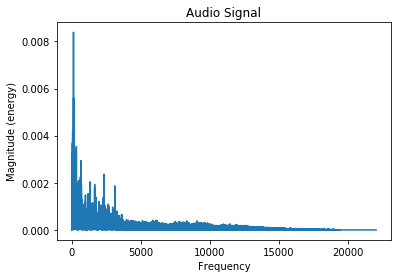

In [5]:
plt.magnitude_spectrum(Sig, Fs=fs)
plt.title('Audio Signal')
plt.savefig('MOD_DEMOD_1.eps') # Für Doku/Präsentation
plt.show()

### Moduliere Audio Signal

In [6]:
f_mod = 12E3
ModSig = modulation(Sig, f_mod, fs)
ipd.Audio(ModSig, rate=fs)

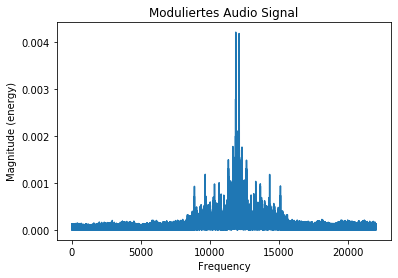

In [7]:
plt.magnitude_spectrum(ModSig, Fs=fs)
plt.title('Moduliertes Audio Signal')
plt.savefig('MOD_DEMOD_2.eps') # Für Doku/Präsentation
plt.show()

### Demoduliere Audio Signal

In [8]:
Sig_recon = demodulation(ModSig , f_mod, fs)
ipd.Audio(Sig_recon, rate=fs)

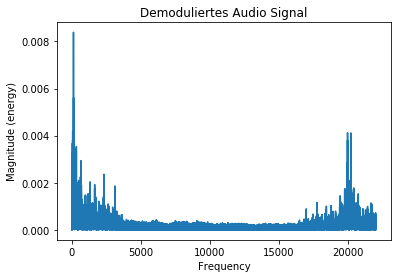

In [9]:
plt.magnitude_spectrum(Sig_recon, Fs=fs)
plt.title('Demoduliertes Audio Signal')
plt.savefig('MOD_DEMOD_3.eps') # Für Doku/Präsentation
plt.show()

Das demodulierte Signal hört sich qualitativ sehr gut an und das obwohl kein Tiefpassfilter benutzt wird. Im rekonstruierten Signal sind zwar Störfrequenzen enthalten, die im ursprünglichen Signal nicht enthalten sind, diese sind jedoch oberhalb von 16kHz, mit den Peaks um 20 kHz und können so von erwachsenen Menschen nicht mehr wahrgenommen werden. Deshalb hört sich das Signal hervorragend an, obwohl Störfreqeuenzen enthalten sind die vorher nicht da waren.